In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from utils_analysis import prepare_scores

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/mila/f/floresl/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/mila/f/floresl/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /home/mila/f/floresl/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
metric = "rougeL"
test_filepath = "/home/mila/f/floresl/beam-search/data/cnn/test.csv"
scores_filepath = "/home/mila/f/floresl/beam-search/results/final/bart-base_data_cnn_checkpoint-200_cnn.json"
temperature = 0.001

df_test = pd.read_csv(test_filepath)
df_test["target"] = df_test["target"].fillna("")

targets = [str(s) for s in df_test["target"]]  # type: ignore

results = prepare_scores(scores_filepath, targets, metric, temperature)  # type: ignore

/home/mila/f/floresl/beam-search/analysis/utils_analysis.py:49: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  abs(spearmanr(ground_truth_score, confidence_score_dict[str(k)]).statistic)  # type: ignore


In [3]:
scores_dataframe = results.scores_dataframe
scores_dataframe["targets"] = targets
scores_dataframe["source"] = df_test["source"]

Text(0, 0.5, 'rougeL')

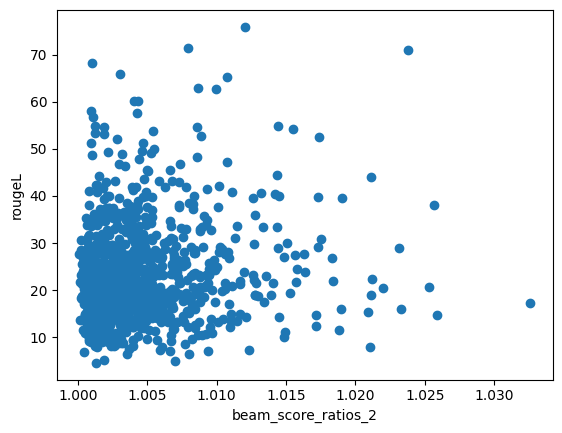

In [4]:
plt.scatter(scores_dataframe["beam_score_ratios_2"], scores_dataframe["rougeL"])
plt.xlabel("beam_score_ratios_2")
plt.ylabel("rougeL")

In [10]:
for i, row in scores_dataframe.loc[
    (scores_dataframe["beam_score_ratios_2"] >= 1.02)
    & (scores_dataframe["rougeL"] <= 30),
    ["sentences", "targets", "source"],
].iterrows():
    print("SOURCE:")
    print("\n".join(row["source"].split(".")))
    print()
    print("PREDICTION:")
    print(row["sentences"])
    print()
    print("TARGET:")
    print(row["targets"])
    print()

SOURCE:
A Transportation Security Administration agent who was fired in Nashville after becoming obsessed with a coworker - following her, taking videos and photos and breaking into her house five times - was jailed this week as a result of the stalking case
 Daniel Boykin, 33, plead guilty to charges of unlawful photography, aggravated burglary, wiretapping, unlawful telephone recording and two computer crimes
 In apologizing for his actions in court Thursday, Boykin admitted to repeatedly filming the woman inside a bathroom at Nashville International Airport and was subsequently sentenced to six months prison
 At the time of his arrest last year, Boykin was found with 92 videos of the victim — 29 taken from the airport bathroom — and 1,527 photographs
 Investigators found additional images taken inside the woman's home of air vents and shelves in the bathroom, which they believe suggested he intended to plant hidden cameras at some point
 Obsessed: Daniel Boykin, 33, a former TSA emp